In [3]:
np.random.seed(0)

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pulp
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from gurobipy import *

#### Input parameters

In [16]:
# 常数

v = 2  # lower limit of m
M = 10  # upper limit of m
t = 2  # lower limit of theta
N = 10  # upper limit of theta
rd = 1.2*1024#kb/s  # the downlink transmission rate
ru = 1.3*1024#kb/s  # the uplink transmission rate
O = 0.5*1024#kb  # the verification feedback size
B = 1#kb  # the transaction size
psi = 0.5  # a predefined parameter that can be defined leveraging the statistics on previous processes of block verification

In [59]:
# beta1 = 1/10
# beta2 = 1/10
# beta3 = 8/10

# beta1 = 1/10
# beta2 = 8/10
# beta3 = 1/10

beta1 = 8/10
beta2 = 1/10
beta3 = 1/10

# beta1 = 1/3
# beta2 = 1/3
# beta3 = 1/3

#### Simulate other parameters

In [60]:
# simulate的
# np.random.seed(0)  # 固定生成的值不变
Xi = np.random.uniform(10**3*8/128, 10**6*8/128, M)  # the amount of available computational resources at verifier i

K = np.random.uniform(5, 500)  # the required computational resources for block verification task
kappa = np.random.uniform(1, 10)  # a coefficient given by the system
q = np.random.uniform(2, 10)  # an indicator factor representing the network scale
rho = np.random.normal(100, 5, M)  # the payment from verifier i to a cloud service provider
ci = np.multiply(rho, Xi)  #  the computational cost of verifier i

#### Define the Objective Function

In [61]:
# beta1,2,3: weights;
# m: the number of the selected verifiiers
# theta: the number of transactions per block
def obj_fun(beta1,beta2,beta3,m,theta):
    
    L = (theta*B/rd)+np.max(K/Xi[0:v])+(psi*theta*B*m)+(O/ru)  # Latency
    S = kappa*m**q  # Secuity
    C = np.sum(ci[0:v])/theta  # Cost
    
    L_m = (N*B/rd)+np.max(K/Xi)+(psi*N*B*M)+(O/ru)
    S_m = kappa*M**q
    C_m = ci.sum()/t
    
    u = beta1*(L/L_m)+beta2*((S_m-S)/S_m)+beta3*(C/C_m)
    return u

### Exhaustive Method

In [62]:
m_exh = [[2]*9,[3]*9,[4]*9,[5]*9,[6]*9,[7]*9,[8]*9,[9]*9,[10]*9]
m_exh = np.array(m_exh)
theta_exh = np.array([2,3,4,5,6,7,8,9,10]*9)
# m_theta = [m_exh,theta_exh]*1024

ind = []
for i in range(81):
    ind.append([m_exh.reshape(-1)[i],theta_exh[i]])

In [63]:
best_x = [2,2]
best_obj = (obj_fun(beta1,beta2,beta3,ind[0][0],ind[0][1]))
U_obj = [obj_fun(beta1,beta2,beta3,ind[0][0],ind[0][1])]
for i in range(1,81,1):
    if (obj_fun(beta1,beta2,beta3,ind[i][0],ind[i][1])) < best_obj:
        best_x = [ind[i][0],ind[i][1]]
        best_obj = obj_fun(beta1,beta2,beta3,ind[i][0],ind[i][1])
    U_obj.append(obj_fun(beta1,beta2,beta3,ind[i][0],ind[i][1]))

print(best_x,best_obj)

[2, 2] 0.15998615789347592


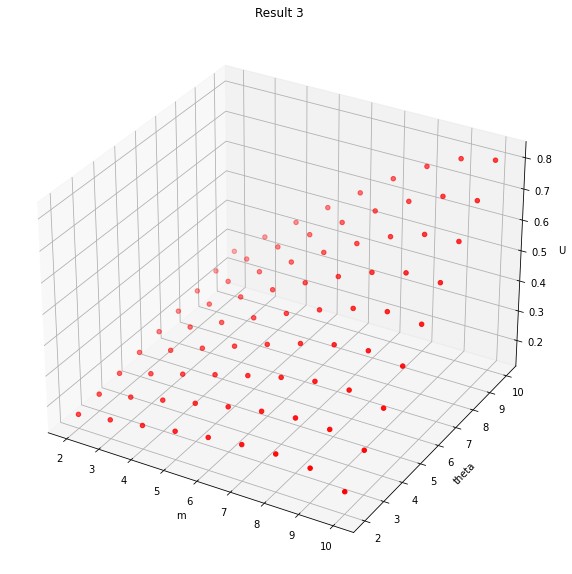

In [64]:
plt.figure(figsize=(10,10))
m_array = np.repeat([2,3,4,5,6,7,8,9,10], 9)
theta_array = [2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10,2,3,4,5,6,7,8,9,10]

ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('Result 3')  # 设置本图名称
ax.scatter(m_array, theta_array, U_obj, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色

ax.set_xlabel('m')  # 设置x坐标轴
ax.set_ylabel('theta')  # 设置y坐标轴
ax.set_zlabel('U')  # 设置z坐标轴

plt.savefig(fname = '3.jpg')
plt.show()

In [52]:
print(obj_fun(beta1,beta2,beta3,2,2))  # 穷举

0.3086869183556809


### Original Algorithm

#### Method 1: 先处理theta

In [190]:
U0 = []
U = np.array(U0)
m_value = np.array(v)
theta_value = np.array(t)

# initialise
U = np.append(U,[obj_fun(beta1,beta2,beta3,v,t)])
theta = 2
m = 2
print(U)

[0.16528373]


In [191]:
for j in range(t+1,N+1):
    if  obj_fun(beta1,beta2,beta3,m,j) < obj_fun(beta1,beta2,beta3,m,j-1):
        theta = j
        U = np.append(U,[obj_fun(beta1,beta2,beta3,m,theta)])
        theta_value = np.append(theta_value,[theta])
        m_value = np.append(m_value,[m])
    else:
        break
for i in range(v+1,M+1):
    if  obj_fun(beta1,beta2,beta3,i,theta) < obj_fun(beta1,beta2,beta3,i-1,theta):
        m = i
        U = np.append(U,[obj_fun(beta1,beta2,beta3,m,theta)])
        theta_value = np.append(theta_value,[theta])
        m_value = np.append(m_value,[m])
    else:
        break
print(m, theta)
print(U)
print(m_value)
print(theta_value)

2 2
[0.16528373]
2
2


#### Plot the Result

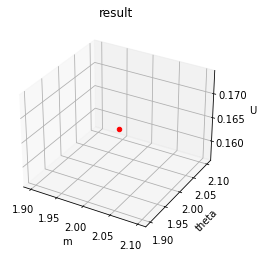

In [192]:
# plt.figure(figsize=(12,12))
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('result')  # 设置本图名称
ax.scatter(theta_value, m_value, U, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色
 
ax.set_xlabel('m')  # 设置x坐标轴
ax.set_ylabel('theta')  # 设置y坐标轴
ax.set_zlabel('U')  # 设置z坐标轴

plt.savefig(fname = '111.jpg')
plt.show()

#### Method 2: 先处理m

In [193]:
U0 = []
U = np.array(U0)
m_value = np.array(v)
theta_value = np.array(t)

# initialise
U = np.append(U,[obj_fun(beta1,beta2,beta3,v,t)])
theta = 2
m = 2
print(U)

[0.16528373]


In [194]:
for i in range(v+1,M+1):
    if  obj_fun(beta1,beta2,beta3,i,theta) < obj_fun(beta1,beta2,beta3,i-1,theta):
        m = i
        U = np.append(U,[obj_fun(beta1,beta2,beta3,m,theta)])
        theta_value = np.append(theta_value,[theta])
        m_value = np.append(m_value,[m])
    else:
        break
for j in range(t+1,N+1):
    if  obj_fun(beta1,beta2,beta3,m,j) < obj_fun(beta1,beta2,beta3,m,j-1):
        theta = j
        U = np.append(U,[obj_fun(beta1,beta2,beta3,m,theta)])
        theta_value = np.append(theta_value,[theta])
        m_value = np.append(m_value,[m])
    else:
        break
print(m,theta)
print(U)
print(m_value)
print(theta_value)

2 2
[0.16528373]
2
2


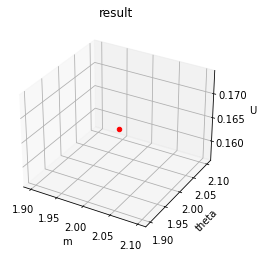

In [195]:
ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('result')  # 设置本图名称
ax.scatter(theta_value, m_value, U, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色
 
ax.set_xlabel('m')  # 设置x坐标轴
ax.set_ylabel('theta')  # 设置y坐标轴
ax.set_zlabel('U')  # 设置z坐标轴
 
plt.show()

In [196]:
print(obj_fun(beta1,beta2,beta3,2,6), obj_fun(beta1,beta2,beta3,2,6))  # 垃圾算法

0.2105711001121929 0.2105711001121929


### PSO

In [8]:
from pso_function import *

In [19]:
w = 1  # 设置惯性权重
c1 = 1  # 设置个体学习系数
c2 = 1  # 设置全局学习系数
r1 = None
r2 = None
dim = 2

population_size_pso = 200  # 初始化粒子群数量n
iter_num = 100  # 迭代次数

best_fitness = float(9e10)  # 初始化适应度的值
fitness_val_list = []

pso(beta1,beta2,beta3,v,M,t,N,rd,ru,O,B,psi,Xi,K,kappa,q,rho,ci,w,c1,c2,r1,r2,dim,population_size_pso,iter_num,best_fitness,fitness_val_list)

0.029815218213435527
[5000.   45.]


In [10]:
print(obj_fun(beta1,beta2,beta3,2,10))  # PSO

NameError: name 'obj_fun' is not defined

### GA

In [115]:
print(obj_fun(beta1,beta2,beta3,6,12))  # GA

0.10065156647648808


### SA

In [14]:
from sa_function import *

In [235]:
population_size_sa = 1  # 总样本数

T = 20
Tmin = 10
KK = 0.9

L = 10  # 马可夫链长度 # 在温度为t情况下的迭代次数

P = 0  # Metropolis过程中总接受点
time = 0  # time

trace = []

sa(beta1,beta2,beta3,v,M,t,N,rd,ru,O,B,psi,Xi,K,kappa,q,rho,ci,population_size_sa,T,Tmin,KK,L,P,time,trace)

optimal solution
 [4647  180]
optimal value of the objective function
 0.11581247144626924


array([4647,  180])

In [103]:
print(obj_fun(beta1,beta2,beta3,2,10))  # SA

NameError: name 'obj_fun' is not defined

##### 

##### 

### PSO

In [223]:
# origin(population_size,v,M,t,N)
# ofunction(population)
# velocity_update(population_size,V,X,pbest,gbest,c1,c2,w,max_val)
# position_updata(population_size,X,V,v,M,t,N)

In [223]:
w = 1  # 设置惯性权重
c1 = 1  # 设置个体学习系数
c2 = 1  # 设置全局学习系数
r1 = None
r2 = None
dim = 1+1+M  # 每个个体变量的数量(m+theta+M个0-1变量)
population_size_pso = 100  # 初始化粒子群数量n
iter_num = 100  # 迭代次数
max_val = 3  # 限定最大速度为3
best_fitness = float(9e10)  # 初始化适应度的值
fitness_val_list = []

In [224]:
from BH_PSO_function import pso

In [225]:
pso(beta1,beta2,beta3,w,c1,c2,r1,r2,M,dim,population_size_pso,iter_num,max_val,best_fitness,fitness_val_list)

/Users/l/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


ValueError: operands could not be broadcast together with shapes (100,5002) (100,12) 

### GA

In [41]:
# species_origin(population_size_ga,chromosome_length,v,M,t,N)
# transformation(population,M,population_size_ga,chromosome_length)
# ofunction(population,M,population_size_ga,chromosome_length)
# FIT(obj_function)
# selection(population,population_size_ga,M)
# crossover(population,v,M,t,N)
# mutation(population,pm,v,M,t,N)

In [42]:
population_size_ga = 200

iteration = 10

dig_theta = 5  # #theta (5个0-1变量表示theta——根据取值范围定的)
chromosome_length = dig_theta + M  # (m=sum(z), theta[5], 0-1z[M])

pc = 0.6
pm = 0.1
 
results = []
Fitness = []

In [45]:
from BH_GA_function import ga

In [46]:
ga(beta1,beta2,beta3,v,M,t,N,population_size_ga,iteration,dig_theta,chromosome_length,pc,pm,results,Fitness)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### SA

In [195]:
# origin(population_size,v,M,t,N)
# obj_fun_SA(beta1,beta2,beta3,population,M)
# X_velocity(X,v,M,t,N,T)

In [226]:
population_size_sa = 1  # 总样本数

T = 50
Tmin = 10
KK = 0.9

L = 100  # 马可夫链长度 # 在温度为t情况下的迭代次数

P = 0  # Metropolis过程中总接受点
time = 0  # time

trace = []

In [227]:
from BH_SA_function import sa

In [228]:
sa(beta1,beta2,beta3,v,M,t,N,population_size_sa,T,Tmin,KK,L,P,time,trace,K,kappa,q,rho,ci,Xi)

ValueError: operands could not be broadcast together with shapes (10,) (5000,) 

##### 

##### 

##### 

#### 

##### 

In [ ]:
np.ceil(bestX)

### 辅助知识

sys

In [ ]:
# maxsize attribute of the sys module fetches the largest value of variable of data type Py_ssize_t can store. 
# It is the Python platform’s pointer that dictates the maximum size of lists and strings in Python. 
# The size value returned by maxsize depends on the platform architecture.

# 32-bit: the value will be 2^31 -1, i.e. 2147483647
# 64-bit: the value will be 2^63 – 1, i.e. 9223372036854775807

# sys.maxsize: 表示操作系统承载的最大int值

bestVal = sys.maxsize
print(bestVal)

##### 

zip

In [ ]:
# zip
# Make an iterator that aggregates elements from each of the iterables.
# Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. 
# The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. 
# With no arguments, it returns an empty iterator.


# >>> a = ['a', 'b', 'c', 'd']
# >>> b = ['1', '2', '3', '4']
# >>> list(zip(a, b))
# [('a', '1'), ('b', '2'), ('c', '3'), ('d', '4')]

bestVal = sum([x*y for x,y in zip(c, bestX)])
print(bestVal)

##### 

enumerate

In [ ]:
# 遍历一个集合对象，它在遍历的同时还可以得到当前元素的索引位置。

names = ["Alice","Bob","Carl"]
for index,value in enumerate(names):
    print(f'{index}: {value}')

##### 

len

In [ ]:
# 返回字符串、列表、字典、元组等长度

##### ———————————————————————————————————————————————————————————————————

### pulp包暴力解法

### 待解决问题：好像不能用定义的变量m直接放在其他变量的计算中

### 考虑解决方法：加入0-1变量，先生成一整个Xi的集合，然后再通过0-1变量选取最优解

### 问题： max在目标函数里面用不了(含自定义的0-1变量) & 含自定义的变量不能加和

In [ ]:
v = 2  # lower limit of m
M = 10  # upper limit of m
t = 2  # lower limit of theta
N = 20  # upper limit of theta

OPT = pulp.LpProblem("OPT", LpMinimize)

m = pulp.LpVariable('m', lowBound=v, upBound=M, cat='Integer') 
theta = pulp.LpVariable('theta', lowBound=t, upBound=N, cat='Integer') 

# for i in range(M):
#    x[i] = pulp.LpVariable('x[i]', cat='Binary')
#???怎么用一个循环或者函数一次生成多个
z = []
for i in range(1, 21):   
    z_temp = pulp.LpVariable('z'+str(i), cat='Binary')
    z.append(z_temp)

opt_vars = LpVariable.dicts("bin",z,cat='Binary')
    
Xi = np.random.uniform(10**3*8/128, 10**6*8/128, [1,M])  

def dotprod (z, Xi):
    XI = []
    for i in range(M):
        XI_temp = z[i]*Xi[i]
        XI = [XI, XI_temp]
    return XI




# L = (theta*B/rd)+np.max(K/Xi)+(psi*theta*B*m)+(O/ru)
beta1 = 1/3
B = 1
rd = 1.2*1024

K = np.random.uniform(50, 500, 1)
### ???不能用np.max   maxK_Xi = np.max(dotprod(z,Xi/K))
### maxK_Xi = max([Xi[i]*opt_vars[i]/K for i in z])

psi = 0.5

O = 0.5*1024
ru = 1.3*1024


# S = kappa*m**q
beta2 = 1/3
kappa = np.random.uniform(1, 10, 1)
q = np.random.uniform(2, 10, 1)


# C = np.sum(ci[0,0:v])/theta
beta3 = 1/3
rho = np.random.normal(100, 5, M)
# ci = lpSum([rho[i]*Xi[i]*opt_vars[i] for i in z])
# ci = lpSum(dotprod (z, rho*Xi))


# # max
# # L_m = (N*B/rd)+np.max(dotprod(z,Xi/K))+(psi*N*B*M)+(O/ru)
# L_m = (N*B/rd)+np.max(Xi/K)+(psi*N*B*M)+(O/ru)
# S_m = kappa*M**q
# C_m = np.sum(rho*Xi)/t

# # L = (theta*B/rd)+np.max(dotprod(z,Xi/K))+(psi*theta*B*m)+(O/ru)  # Latency
# # L = (theta*B/rd)+maxK_Xi+(psi*theta*B*m)+(O/ru)

# L = (theta*B/rd)+np.max(Xi/K)+(psi*theta*B*m)+(O/ru)
# S = kappa*m**q  # Secuity
# C = lpSum([rho[i]*Xi[i]*opt_vars[i] for i in z])/theta  # Cost


    
# OPT += beta1*(L/L_m)+beta2*(S_m/S)+beta3*(C/C_m)

OPT += beta1*(((theta*B/rd)+np.max(Xi/K)+(psi*theta*B*m)+(O/ru))/((N*B/rd)+np.max(Xi/K)+(psi*N*B*M)+(O/ru))) + beta2*((kappa*M**q)/(kappa*m**q)) + beta3*((lpSum([rho[i]*Xi[i]*opt_vars[i] for i in z])/theta)/(np.sum(rho*Xi)/t))


OPT.solve()

print("Status:", pulp.LpStatus[OPT.status])
for v in OPT.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F(x) = ", pulp.value(OPT.objective))  #输出最优解的目标函数值

Example1:

max		fx = 2*x1 + 3*x2 - 5*x3
s.t.	x1 + 3*x2 + x3 <= 12
		2*x1 - 5*x2 + x3 >= 10
		x1 + x2 + x3 = 7
		x1, x2, x3 >=0

In [ ]:
import pulp

# 定义一个规划问题
MyProbLP = pulp.LpProblem("LPProbDemo1", sense=pulp.LpMaximize)
# pulp.LpProblem 是定义问题的构造函数。
# "LPProbDemo1"是用户定义的问题名（用于输出信息）。
# 参数 sense 用来指定求最小值/最大值问题，可选参数值：LpMinimize、LpMaximize


# 定义变量
x1 = pulp.LpVariable('x1', lowBound=0, upBound=7, cat='Continuous') 
x2 = pulp.LpVariable('x2', lowBound=0, upBound=7, cat='Continuous') 
x3 = pulp.LpVariable('x3', lowBound=0, upBound=7, cat='Continuous') 
# pulp.LpVariable 是定义决策变量的函数。
# ‘x1’ 是用户定义的变量名。
# 参数 lowBound、upBound 用来设定决策变量的下界、上界；可以不定义下界/上界，默认的下界/上界是负无穷/正无穷。本例中 x1,x2,x3 的取值区间为 [0,7]。
# 参数 cat 用来设定变量类型，可选参数值：‘Continuous’ 表示连续变量（默认值）、’ Integer ’ 表示离散变量（用于整数规划问题）、’ Binary ’ 表示0/1变量（用于0/1规划问题）


# 设置目标函数
MyProbLP += 2*x1 + 3*x2 - 5*x3

# 不等式&等式约束条件
MyProbLP += (2*x1 - 5*x2 + x3 >= 10)    # 不等式约束
MyProbLP += (x1 + 3*x2 + x3 <= 12)    # 不等式约束
MyProbLP += (x1 + x2 + x3 == 7)    # 等式约束
# 添加约束条件使用 “问题名 += 约束条件表达式” 格式。
# 约束条件可以是等式约束或不等式约束，不等式约束可以是 小于等于 或 大于等于，分别使用关键字">="、"<=“和”=="


# 求解
MyProbLP.solve()


# 输出求解状态
print("Status:", pulp.LpStatus[MyProbLP.status])
for v in MyProbLP.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F(x) = ", pulp.value(MyProbLP.objective))  #输出最优解的目标函数值

solve() 是求解函数。PuLP默认采用 CBC 求解器来求解优化问题，也可以调用其它的优化器来求解，如：GLPK，COIN CLP/CBC，CPLEX，和GUROBI，但需要另外安装

##### 

### Branch and Bound (分枝定界算法)

### 待解决的问题：怎么优化减枝???

In [ ]:
import math
from scipy.optimize import linprog
import sys

# c: Parameters in the objective function
# A: Parameters in the inequality constraints (less or equal than)
# b: Value on the right side inequality constraint
# Aeq: Parameters in the equation constraints (less or equal than)
# beq: Value on the right side equation constraint

# Min cx
# s.t. Ax ≤ b
#      Aeqx = beq 
#      x ∈ Z


# 自己写的
def integerPro(c, A, b, Aeq, beq, t=1.0E-12):
    # 求解松弛问题
    res = linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq)
    bestX = res.x
    bestVal = res.fun
    
    # 判断是否满足所有限制条件 & 成功终止优化
    if all(((x-math.floor(x)) < t or (math.ceil(x)-x) < t) for x in bestX) and res.status == 0:
        return (bestX, bestVal)
    
    # 没满足整数解的限制条件时进行branch & bound
    # 选择一个变量从当前最优解分开，比较两边最近整数解的情况，选择最优解，不断迭代
    else:
        I = []
        for i, x in enumerate(bestX):
            if (x-math.floor(x)) > t and (math.ceil(x)-x) > t:
                I.append(i)
        
        ind = I[0]
                
        up_x = math.ceil(bestX[ind])
        down_x = math.floor(bestX[ind])
                
        newCon1 = [0]*len(bestX)
        newCon2 = [0]*len(bestX)
        newCon1[i] = 1
        newCon2[i] = 1
                
        newA1 = A.copy()
        newA2 = A.copy()
        newA1.append(newCon1)
        newA2.append(newCon2)
               
        newB1 = b.copy()
        newB2 = b.copy()
        newB1.append(np.multiply(-np.ceil(bestX), newCon1))
        newB2.append(np.multiply(np.floor(bestX), newCon2))
        r1 = integerPro(c, newA1, newB1, Aeq, beq)
        r2 = integerPro(c, newA2, newB2, Aeq, beq)
        if r1.fun < r2.fun:
            return r1
        else:
            return r2

In [ ]:
c = [3,4,1]
A = [[-1,-6,-2],[-2,0,0]]
b = [-5,-3]
Aeq = [[0,0,0]]
beq = [0]
print(integerPro(c, A, b, Aeq, beq))

In [ ]:
# 别人的代码
def integerPro(c, A, b, Aeq, beq, t=1.0E-12):
    # 求解松弛问题
    res = linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq)
    bestVal = sys.maxsize  # ???????????这是在干嘛
    bestX = res.x
    
    # 这个条件想干嘛
    # 没有x是float / 优化成功终止???
    if not(type(res.x) is float or res.status != 0): 
        bestVal = sum([x*y for x,y in zip(c, bestX)])
    
    # 为什么前面要写两个判断条件
    # 停止条件 & bound (all variables are integer)
    if all(((x-math.floor(x)) < t or (math.ceil(x)-x) < t) for x in bestX):
        return (bestVal,bestX)
    else:
        # 进行branch，这里简单选择第一个非整数变量
        # ???ind = [i for i, x in enumerate(bestX) if (x-math.floor(x))>t and (math.ceil(x)-x)>t][0]  
        # ???这里的 i for i是什么
        # 改成下面的了
        
        I = []
        for i, x in enumerate(bestX):
            if (x-math.floor(x)) > t and (math.ceil(x)-x) > t:
                I.append(i)
        
        ind = I[0]
            
        # branch出两个子问题
        newCon1 = [0]*len(A[0])
        newCon2 = [0]*len(A[0])
        newCon1[ind] = -1
        newCon2[ind] = 1
        newA1 = A.copy()
        newA2 = A.copy()
        newA1.append(newCon1)
        newA2.append(newCon2)
        newB1 = b.copy()
        newB2 = b.copy()
        newB1.append(-np.ceil(bestX[ind]))
        newB2.append(math.floor(bestX[ind]))
        r1 = integerPro(c, newA1, newB1, Aeq, beq)
        r2 = integerPro(c, newA2, newB2, Aeq, beq)
        # tree search，这里使用width first
        if r1[0] < r2[0]:
            return r1
        else:
            return r2

In [ ]:
c = [3,4,1]
A = [[-1,-6,-2],[-2,0,0]]
b = [-5,-3]
Aeq = [[0,0,0]]
beq = [0]
print(integerPro(c, A, b, Aeq, beq))

In [ ]:
for i, x in enumerate(bestX):
    if (x-math.floor(x)) > t and (math.ceil(x)-x) > t:
        I.append(i)
ind = I[0]
print(ind)

In [ ]:
c = [3,4,1]
A = [[-1,-6,-2],[-2,0,0]]
b = [-5,-3]
Aeq = [[0,0,0]]
beq = [0]

res = linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq)
bestVal = sys.maxsize
bestX = res.x
print(bestVal, bestX)

In [ ]:
res

In [ ]:
for i, x in enumerate(bestX): 
#    if (x-math.floor(x))>t and (math.ceil(x)-x)>t:
        print(x-math.floor(x), math.ceil(x)-x)

In [ ]:
newCon1 = [0]*len(bestX)
newCon2 = [0]*len(bestX)
newCon1[i] = 1
newCon2[i] = 1
print(np.multiply(newCon1, c))